<a href="https://colab.research.google.com/github/pszwed-ai/lab-eksploracja-danych/blob/main/Klasyfikacja_gatunk%C3%B3w_muzyki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja gatunków muzyki
## Imię i nazwisko
Celem laboratorium jest przeprowadzenie klasyfikacji gatunków muzyki na podstawie wyodrębnionych cech.
* Zastosujemy skalowanie cech
* Porównamy kilka klasyfikatorów
* Zastosujemy ciąg przetwarzania (*pipeline*)



## 1. Pobieramy i wczytujemy dane

In [112]:
# !curl -o gitzan_small_features.csv https://dysk.agh.edu.pl/s/foAZjcKxtX2TQj5/download

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [114]:
df = pd.read_csv('gitzan_small_features.csv').drop(columns = ['Unnamed: 0'])
df.head()


,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,...,chroma08_var,chroma09_mean,chroma09_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,tempo
0,classical,classical.00009.wav,[ 0.01455688 0.02090454 0.01434326 ... -0.03...,22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,...,0.099639,0.213113,0.057743,0.254609,0.071775,0.281618,0.093348,0.184853,0.027074,129.199219
1,classical,classical.00004.wav,[-0.01077271 -0.02001953 -0.02426147 ... -0.10...,22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,...,0.041241,0.183229,0.070243,0.310166,0.124506,0.182775,0.055630,0.304015,0.101638,107.666016
2,classical,classical.00002.wav,[-0.04046631 -0.07815552 -0.08737183 ... -0.06...,22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,...,0.021263,0.281557,0.076378,0.286905,0.087733,0.178080,0.016680,0.460017,0.150065,99.384014
3,classical,classical.00003.wav,[-0.0083313 -0.02258301 -0.04367065 ... 0.00...,22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,...,0.111205,0.114515,0.009307,0.200648,0.067195,0.167862,0.039964,0.202532,0.049618,135.999178
4,classical,classical.00001.wav,[-0.01138306 -0.00216675 0.01687622 ... -0.02...,22050,0.087911,0.000188,1360.209759,10357.021704,0.030631,0.000033,...,0.049780,0.090736,0.014726,0.175968,0.075013,0.216879,0.051535,0.468043,0.182710,117.453835


Oprócz wyznaczonych cech zbiór danych zawiera oryginalne surowe dane i ich etykiety

In [115]:
df.columns

Index(['genre', 'file', 'audio', 'sr', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'rms_mean', 'rms_var', 'spectral_rolloff_mean',
       'spectral_rolloff_var', 'mfcc01_mean', 'mfcc01_var', 'mfcc02_mean',
       'mfcc02_var', 'mfcc03_mean', 'mfcc03_var', 'mfcc04_mean', 'mfcc04_var',
       'mfcc05_mean', 'mfcc05_var', 'mfcc06_mean', 'mfcc06_var', 'mfcc07_mean',
       'mfcc07_var', 'mfcc08_mean', 'mfcc08_var', 'mfcc09_mean', 'mfcc09_var',
       'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
       'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var', 'chroma01_mean', 'chroma01_var',
       'chroma02_mean', 'chroma02_var', 'chroma03_mean', 'chroma03_var',
       'chroma04_mean'

**TODO**
* Usuń zbędne kolumny z DataFrame (te które nie są wyznaczonymi cechami)
* Przekonwertuj do postaci macierzy ```numpy``` za pomocą metody ```to_numpy()```

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler

# wyznaczanie etykiet w postci liczbowej
labels = df['genre']
le = LabelEncoder()
y = le.fit_transform(labels)
print(y)
print(le.classes_)

#usuwanie zbędnych kolumn
X = df.drop(columns=['file', 'genre', 'audio', 'sr'])
print(X.shape)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 5 5 5 5 5 5 5
 5 5 5 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 3 3 3 3
 3 3 3 3 3 3 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7]
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(100, 73)


## 2. Klasyfikacja

**TODO**
* Zastosuj klasyfikator ```GaussianNB``` i wyznacz przewidywane przez klasyfikator etykiety ```y_pred``` za pomocą funkcji ```cross_val_predict()``` z parametrem ```cv=10```
* Wyznacz macierz pomyłek za pomocą funkcji ```confusion_matrix()```, a następnie wydrukuj ją

In [117]:
# Funkcja pobrana z https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

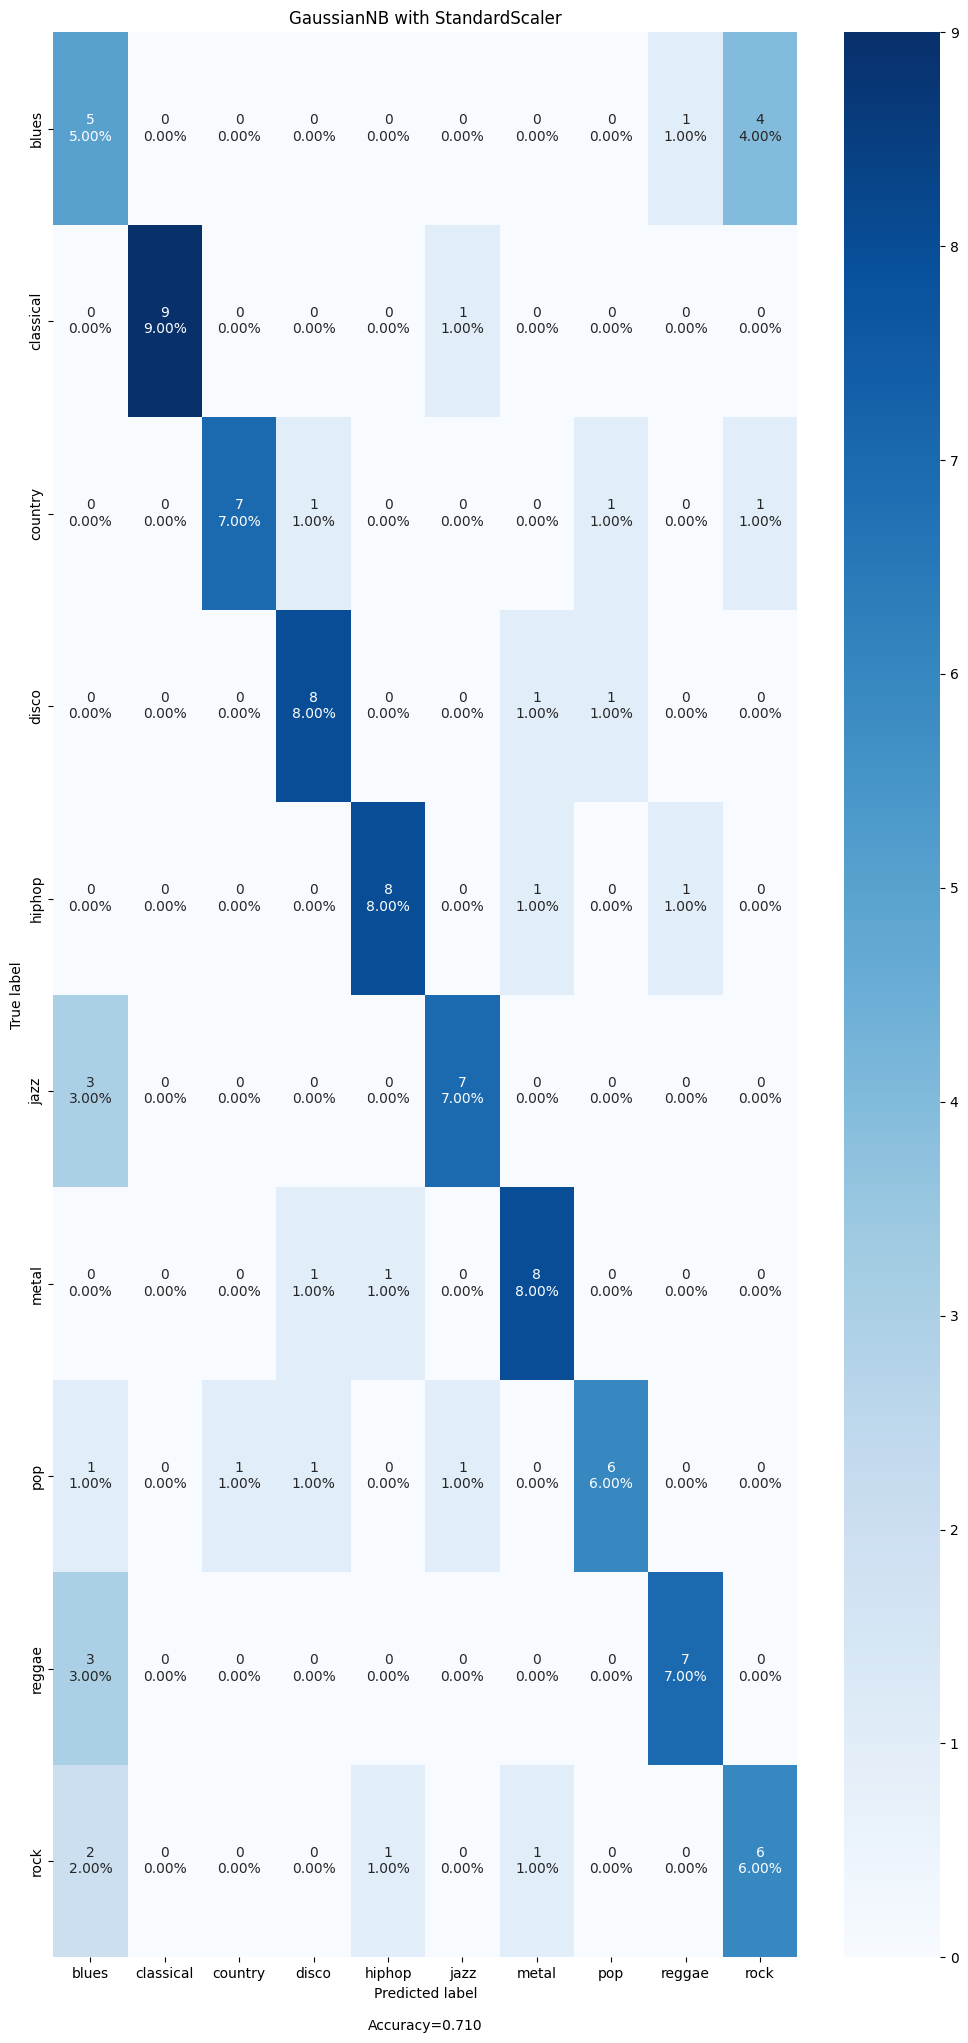

In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

scl = StandardScaler()
X_scaled = scl.fit_transform(X)
clf = GaussianNB()

y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
make_confusion_matrix(conf_mat, categories=le.classes_, title='GaussianNB with StandardScaler')

Zilustrujemy macierz pomyłek wraz z etykietami

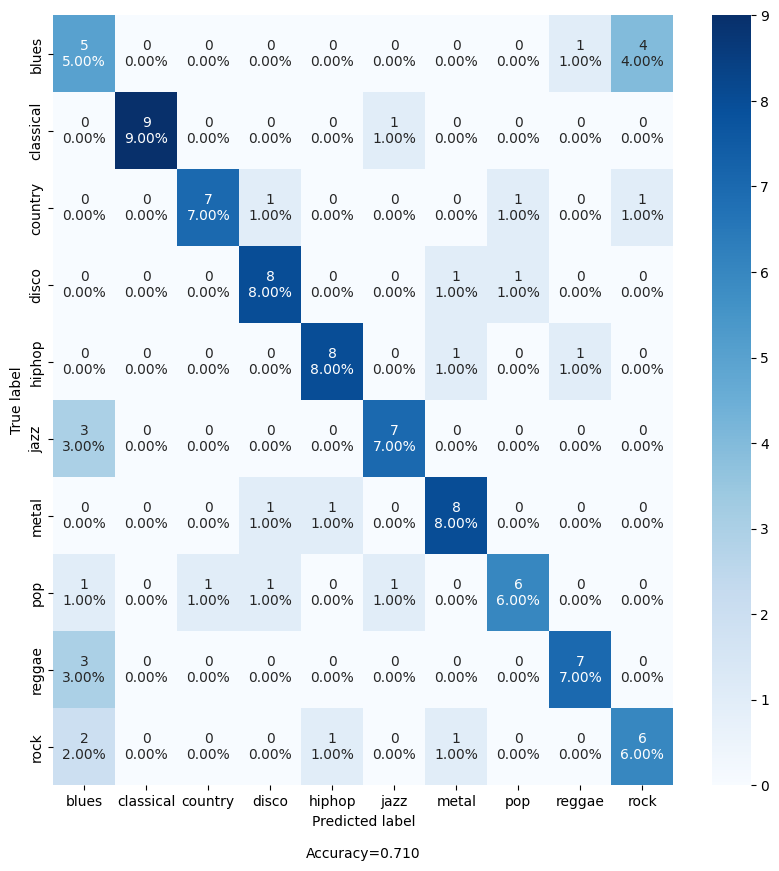

In [119]:
plt.rcParams["figure.figsize"] = (10,10)
make_confusion_matrix(conf_mat,categories=le.classes_)

### 2.1 Skalowanie

Zastosujemy skalowanie cech:
* StandardScaler
* MinMaxScaler

**TODO**
* Jak przekształca dane StandardScaler?
* Co robi MinMaxScaler?
* Który z nich może zwrócić dane ujemne?

In [120]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = np.asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print("Przed skalowaniem")
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled)

print(f'scaler.mean_={scaler.mean_}')
print(f'scaler.var_={scaler.var_}')

print(f'data.mean(axis=0)={data.mean(axis=0)}')
print(f'data.std(axis=0)**2={data.std(axis=0)**2}')

print(f'scaled.mean(axis=0)={scaled.mean(axis=0)}')
print(f'scaled.std(axis=0)**2={scaled.std(axis=0)**2}')


Przed skalowaniem
[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
Po skalowaniu
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
scaler.mean_=[5.00e+01 4.52e-02]
scaler.var_=[1.56480e+03 1.44216e-03]
data.mean(axis=0)=[5.00e+01 4.52e-02]
data.std(axis=0)**2=[1.56480e+03 1.44216e-03]
scaled.mean(axis=0)=[ 4.4408921e-17 -4.4408921e-17]
scaled.std(axis=0)**2=[1. 1.]


In [121]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled)

Po skalowaniu
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Zobaczmy na wyniki po skalowaniu

**TODO**
* Przeprowadź skalowanie i klasyfikację używając przeskalowanych cech
* Wyznacz przewidywane etykiety za pomocą ```cross_val_predict(..., cv=10)```
* Narysuj macierz pomyłek
* Czy skalowanie miało jakiś wpływ na wyniki?

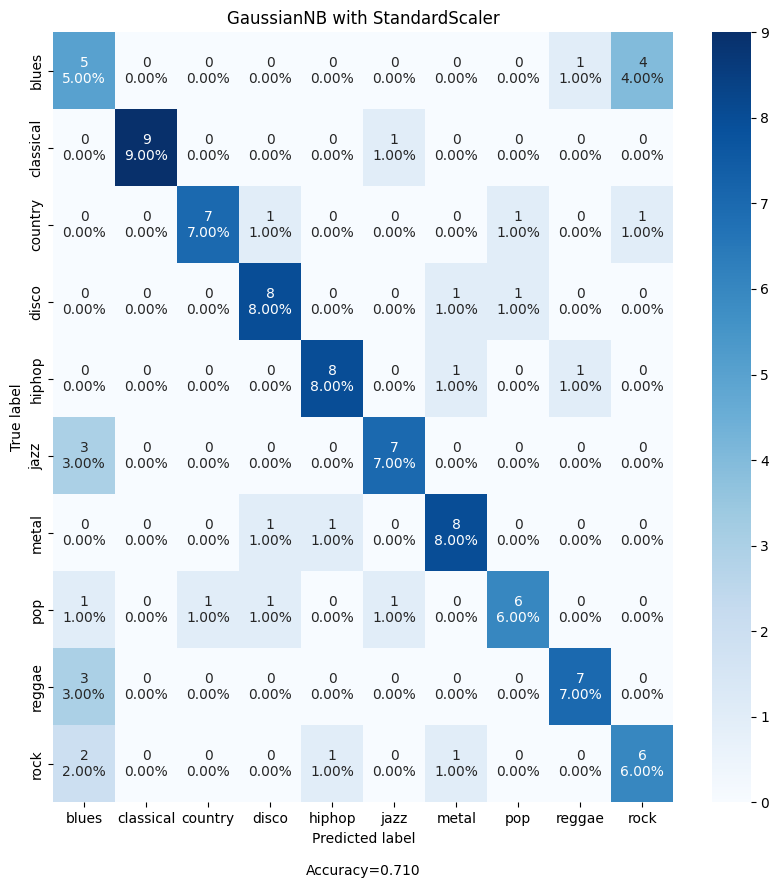

In [122]:
scl = StandardScaler()
X_scaled = scl.fit_transform(X)
clf = GaussianNB()

y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
make_confusion_matrix(conf_mat, categories=le.classes_, title='GaussianNB with StandardScaler')


### 2.2 Budujemy ciąg przetwarzania (pipeline)

In [123]:
from sklearn.pipeline import make_pipeline
scl = StandardScaler()
clf = GaussianNB()

pipeline = make_pipeline(scl, clf)
print(pipeline)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])


Pipeline ma typowe metody klasyfikatora: ```fit()``` i ```predict()```

In [124]:
import sklearn
pipeline.fit(X,y)
y_pred = pipeline.predict(X)
print(f'Accuracy:{sklearn.metrics.accuracy_score(y,y_pred)}')


Accuracy:0.92


Oczywiście jest to wynik wyznaczony dla całego zbioru danych. W przypadku podziału na zbiór uczący/testowy rezultat będzie gorszy.

**Powinniśmy zastosować określić parametry sklaowania na podstawie zbioru uczącego, a następnie  zastosować je przy transformacji danych zbioru testowego.**

### 2.3 Jak wygląda transformacja nieznanych danych?
**TODO**
* Sprawdź, czy mieszczą się w zakresie dla danych uczących. Pamiętaj, że skalujemy cechy, czyli dane w kolumnach

In [125]:
data = np.asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=[0,1])
scaler.fit(data)

# print(data)
unobserved_data = np.asarray([[110, -0.1],
				[-4, 0.12]])
scaled =scaler.transform(unobserved_data)
print(unobserved_data)
print(scaled)



[[ 1.1e+02 -1.0e-01]
 [-4.0e+00  1.2e-01]]
[[ 1.10416667 -1.02020202]
 [-0.08333333  1.2020202 ]]


Testujemy trafność (accuracy) dla różnych losowych podziałów

In [126]:
from sklearn.model_selection import train_test_split
import sklearn
for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  print(f'Accuracy:{sklearn.metrics.accuracy_score(y_test,y_pred)}')



Accuracy:0.7
Accuracy:0.5
Accuracy:0.4
Accuracy:0.9
Accuracy:0.6
Accuracy:0.8
Accuracy:0.7
Accuracy:0.4
Accuracy:0.8
Accuracy:0.8
Accuracy:0.7
Accuracy:0.7
Accuracy:0.8
Accuracy:0.8
Accuracy:0.5
Accuracy:0.8
Accuracy:0.8
Accuracy:0.7
Accuracy:0.7
Accuracy:0.6


**TODO**
* Analogicznie wywołaj ```cross_val_predict()``` zastępując klasyfikator zdefiniowanym ciągiem przetwarzania ```pipeline```
* Następnie, wyświetl macierz pomyłek

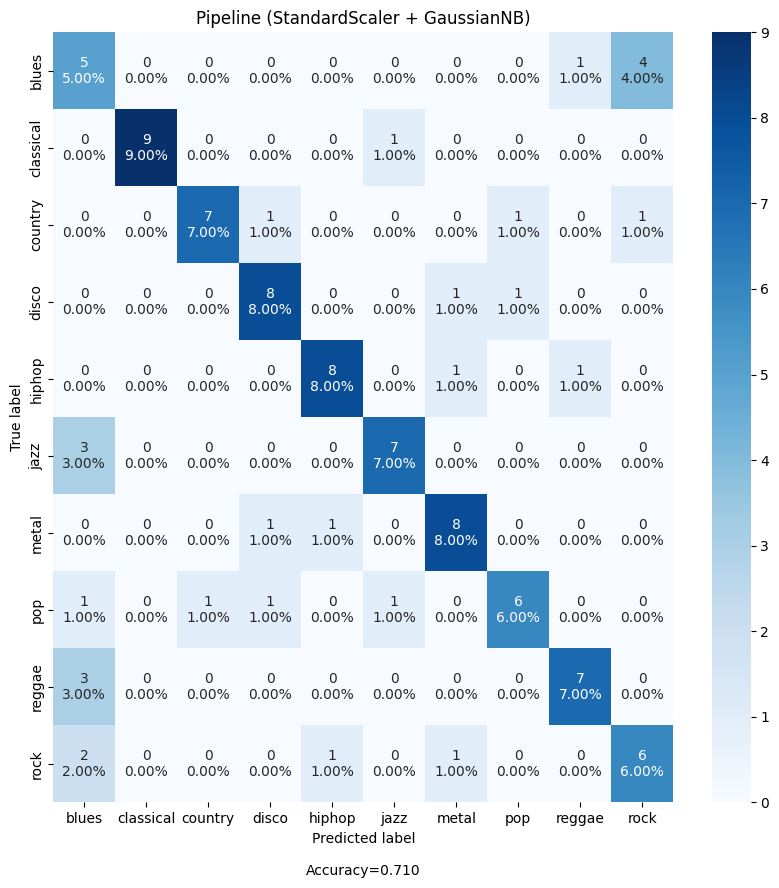

In [127]:
y_pred = cross_val_predict(pipeline, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
make_confusion_matrix(conf_mat, categories=le.classes_, title='Pipeline (StandardScaler + GaussianNB)')


### 2.4 Zbieramy metryki

Zobaczmy jakie są zdefiniowane...

In [128]:
import sklearn
sorted(sklearn.metrics.get_scorer_names())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

**TODO**
* Zbierz następujące metryki: accuracy, precision, recall i F1 (trzy ostatnie w wersji makro) stosując walidację krzyzową
* Wyznacz wartości średnie

In [129]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
print(cv_results)


{'fit_time': array([0.00315309, 0.00198388, 0.00190902, 0.00174594, 0.00168443,
       0.00167608, 0.0016408 , 0.00167584, 0.00163603, 0.00165415]), 'score_time': array([0.00400996, 0.00323296, 0.00289702, 0.003474  , 0.00284076,
       0.00278878, 0.00283027, 0.002774  , 0.00278401, 0.00276875]), 'test_accuracy': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_precision_macro': array([0.85      , 0.48333333, 0.43333333, 0.7       , 0.55      ,
       0.85      , 0.5       , 0.7       , 0.85      , 0.38333333]), 'test_recall_macro': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_f1_macro': array([0.86666667, 0.51666667, 0.45      , 0.73333333, 0.56666667,
       0.86666667, 0.53333333, 0.73333333, 0.86666667, 0.41666667])}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [130]:
acc = cv_results['test_accuracy'].mean()
prec = cv_results['test_precision_macro'].mean()
recall = cv_results['test_recall_macro'].mean()
f1 = cv_results['test_f1_macro'].mean()

print(f'acc={acc} prec={prec} recall={recall} f1={f1}')


acc=0.71 prec=0.63 recall=0.71 f1=0.6549999999999999


## 3. Testy wielu klasyfikatorów

Dodamy funkcję, która zbuduje pipeline, wywoła cross_val_predict(), wyznaczy i wyświetli macierz pomyłek.

**TODO**
* Uzupełnij brakujący kod

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
plt.rcParams["figure.figsize"] = (10,10)


def cv_show_confusion_matrix(X,y,labels,scaler,classifier,cv=10,title=None):
  pipeline = make_pipeline(scaler, classifier)
  y_pred = cross_val_predict(pipeline, X, y, cv=cv)
  conf_mat = confusion_matrix(y, y_pred)
  if title is None:
    title = scaler.__class__.__name__ + " + " + classifier.__class__.__name__
  else:
    title = title+': '+scaler.__class__.__name__ + " + " + classifier.__class__.__name__
  make_confusion_matrix(conf_mat,categories=labels,title=title)


Sprawdzimy, czy działa dla MultinomialMB. Użyjemy parametru ```feature_range=[1,2]```, aby przypadkowo nie dostarczać do ```MultinomialNB``` wartości ujemnych. W nowszej wersji biblioteki jest parametr ```clip``` (przytnij do zakresu).

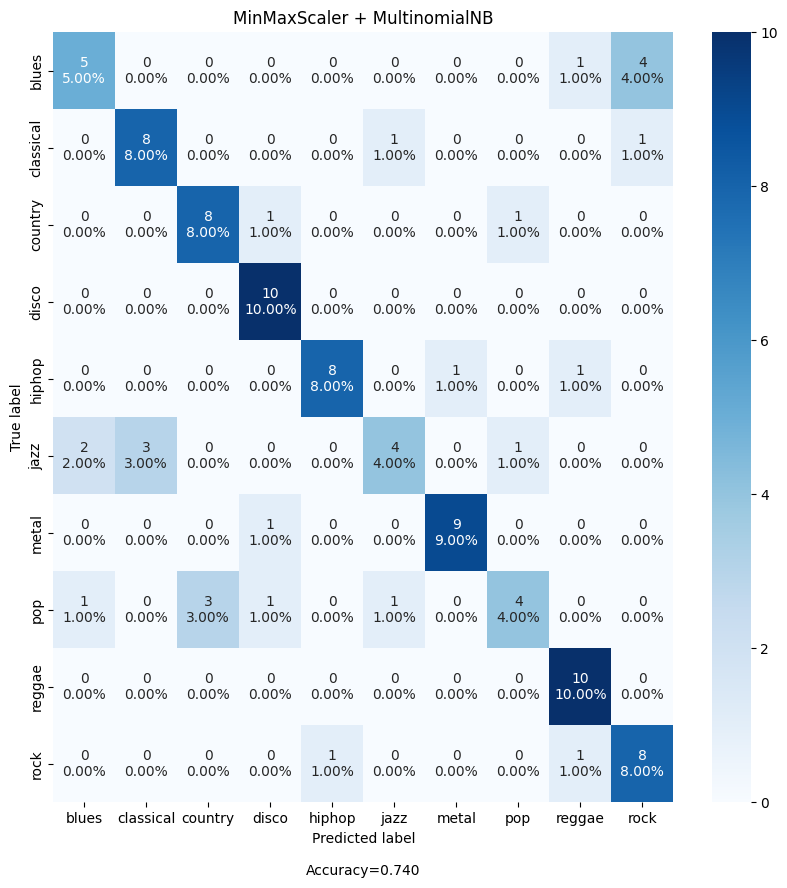

In [132]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
cv_show_confusion_matrix(X,y,labels=le.classes_,scaler=MinMaxScaler(feature_range=(1,2)),classifier=MultinomialNB(alpha=0.1))

### 3.1 Tworzymy listę konfiguracji i wyświetlamy macierze pomyłek

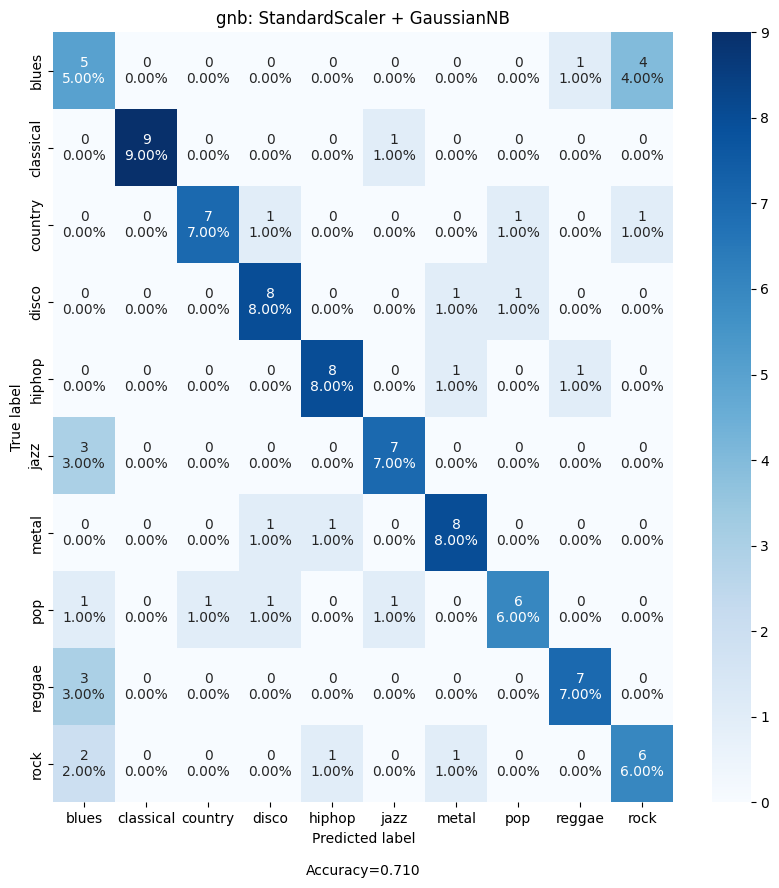

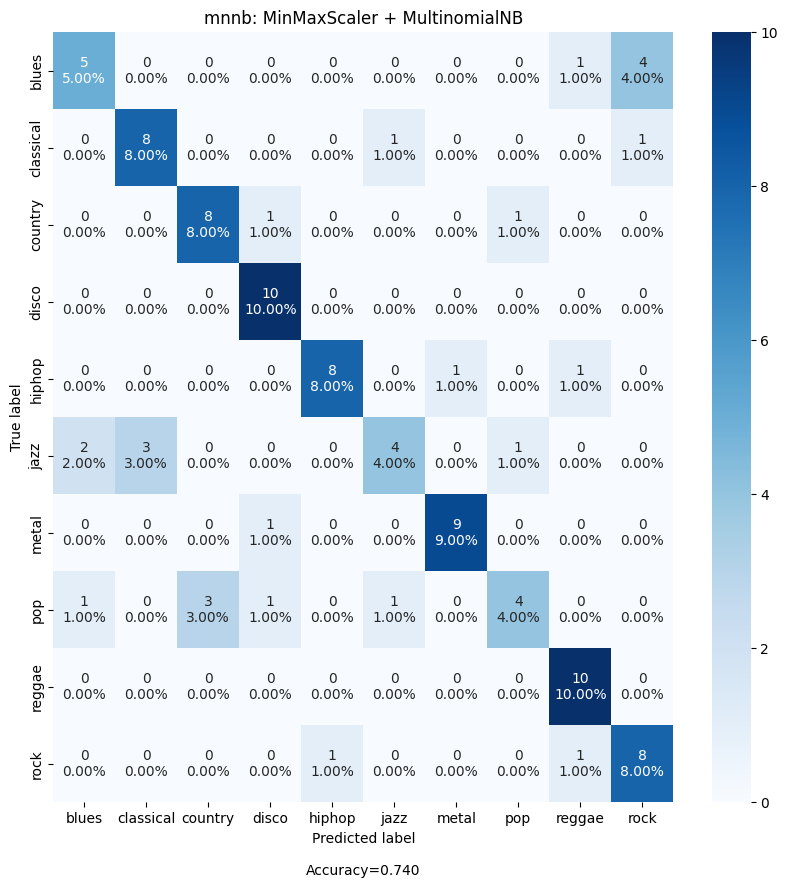

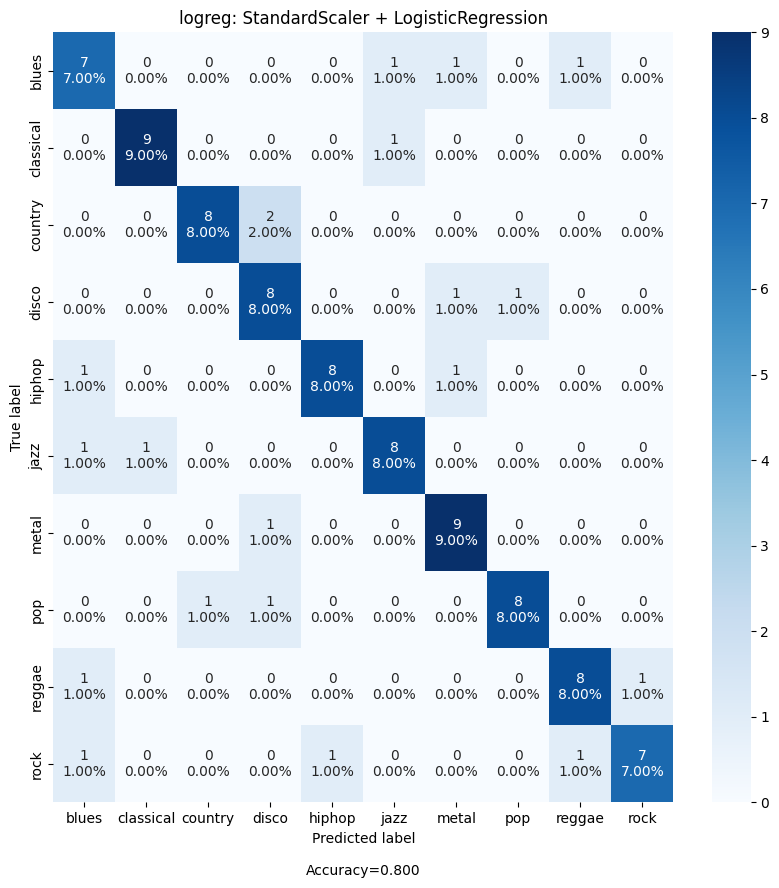

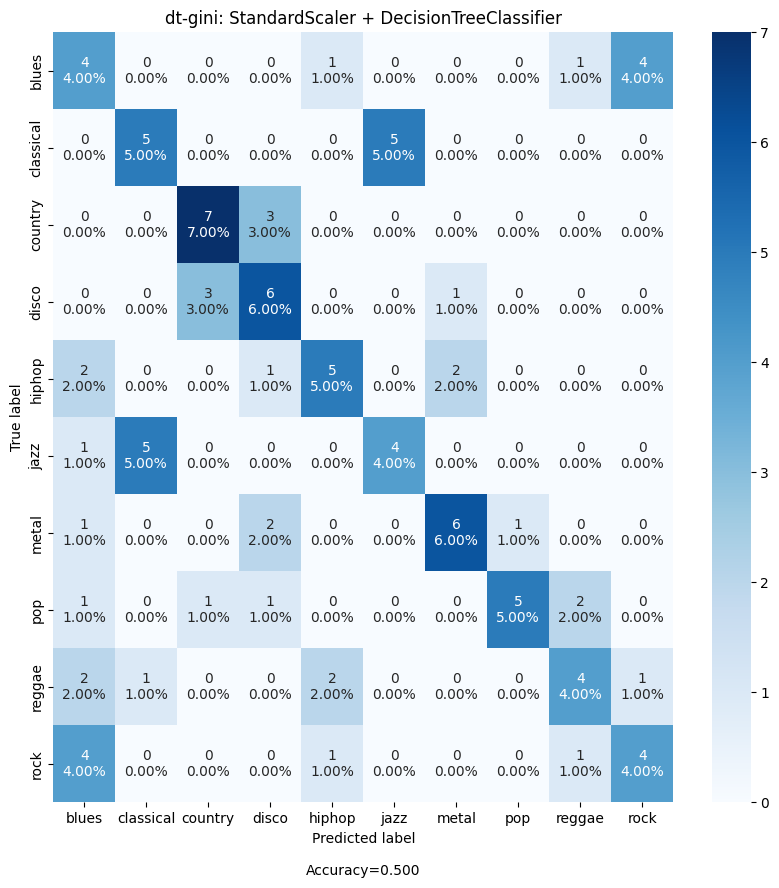

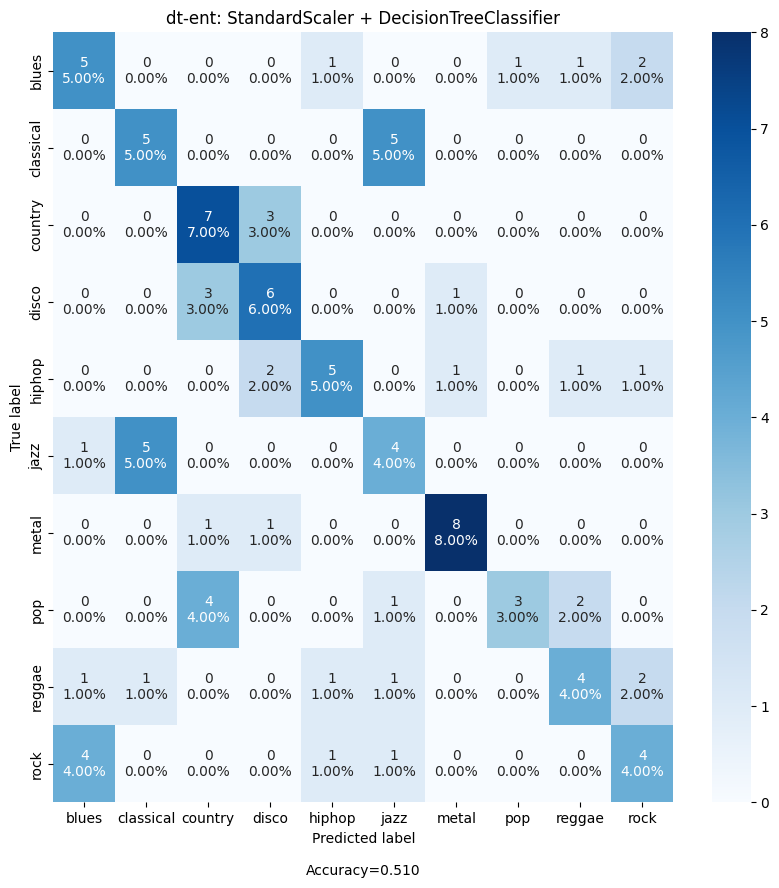

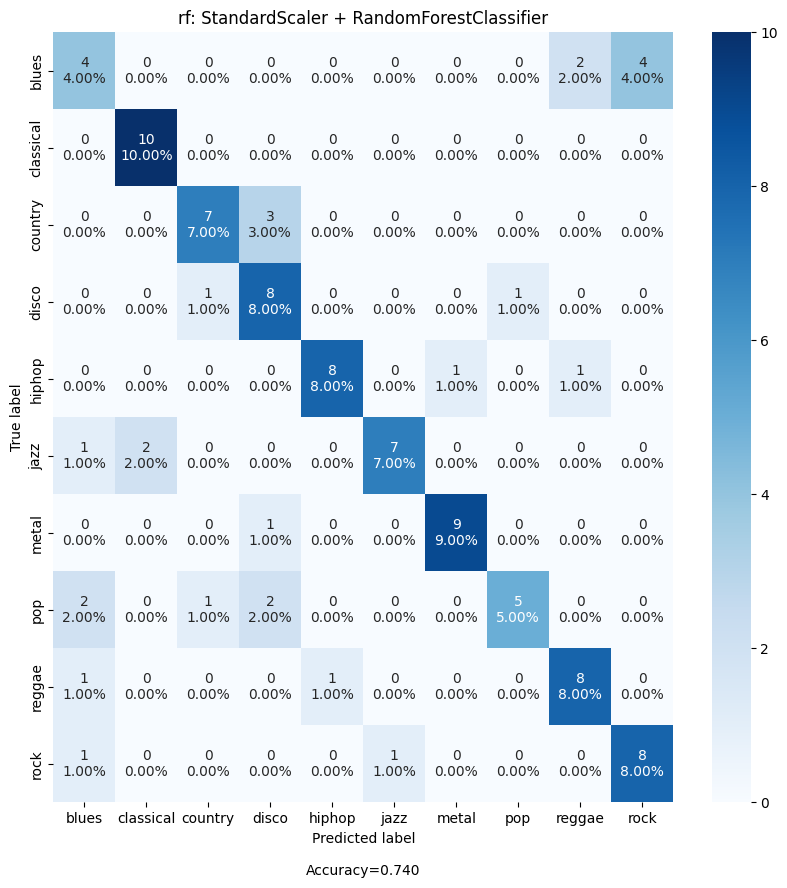

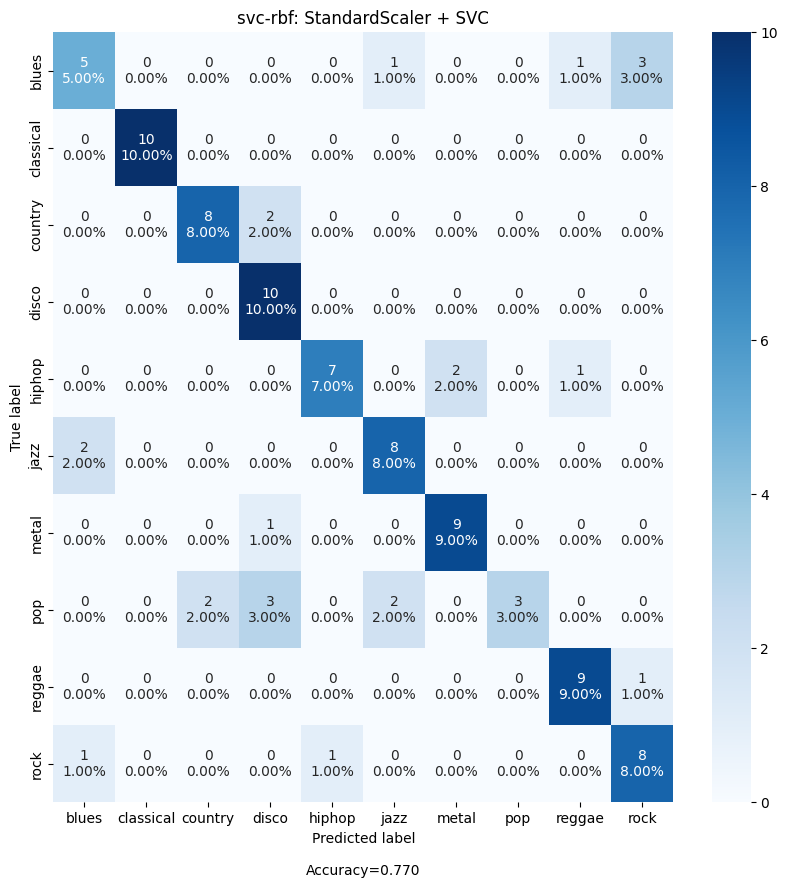

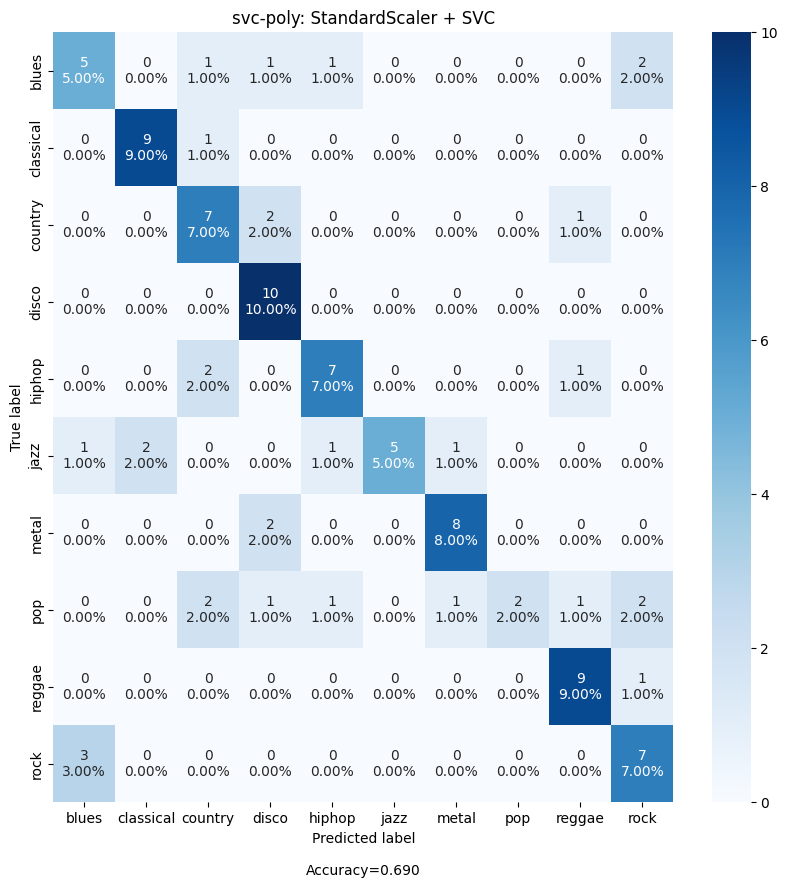

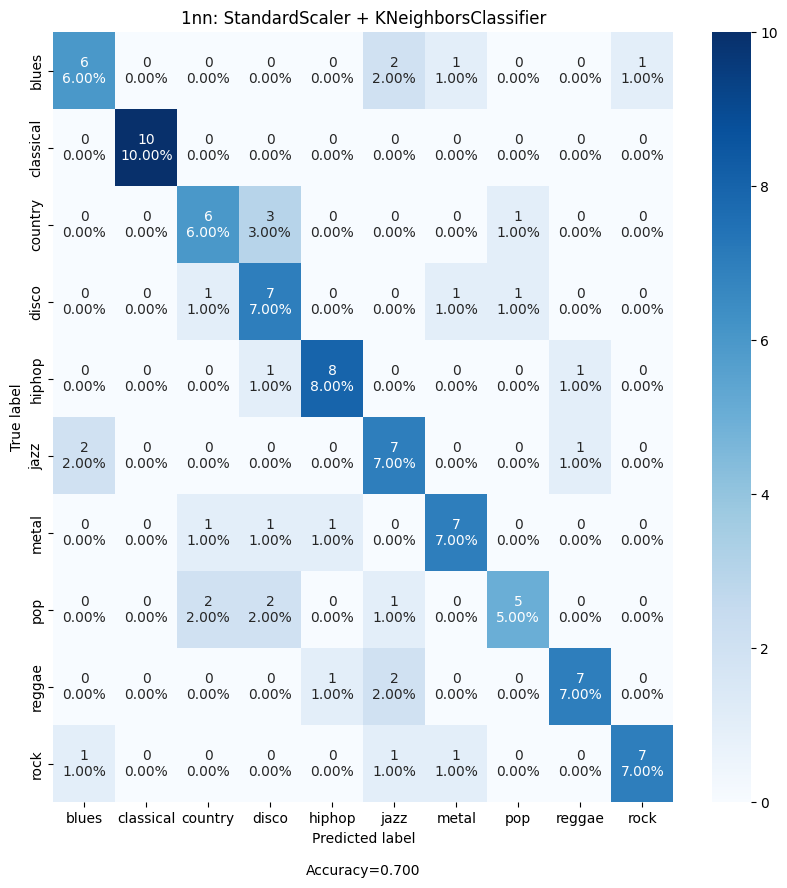

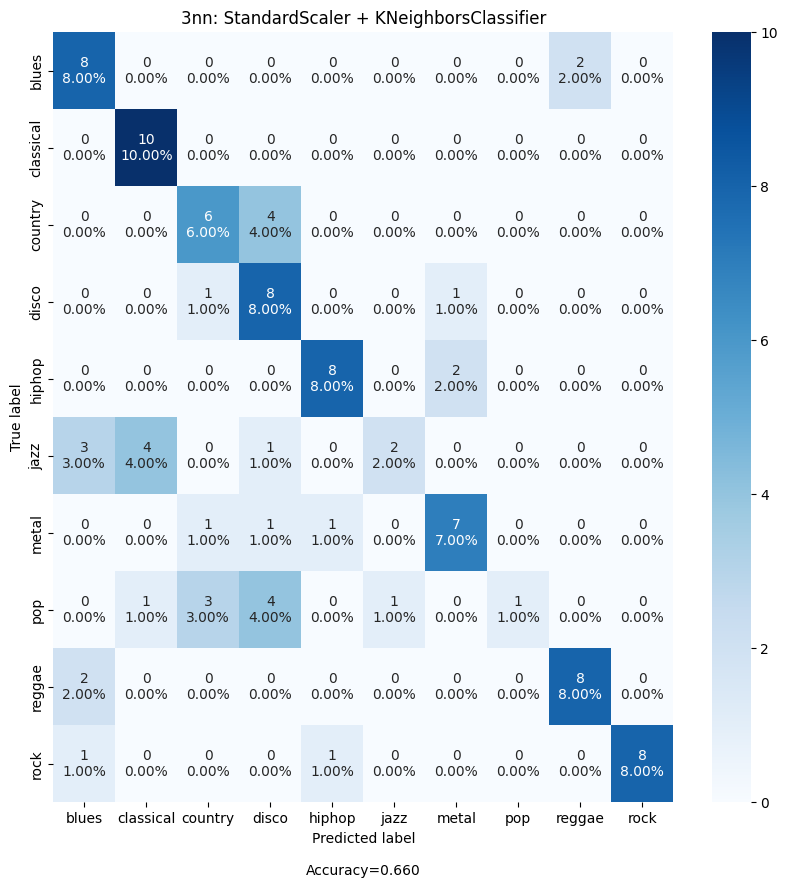

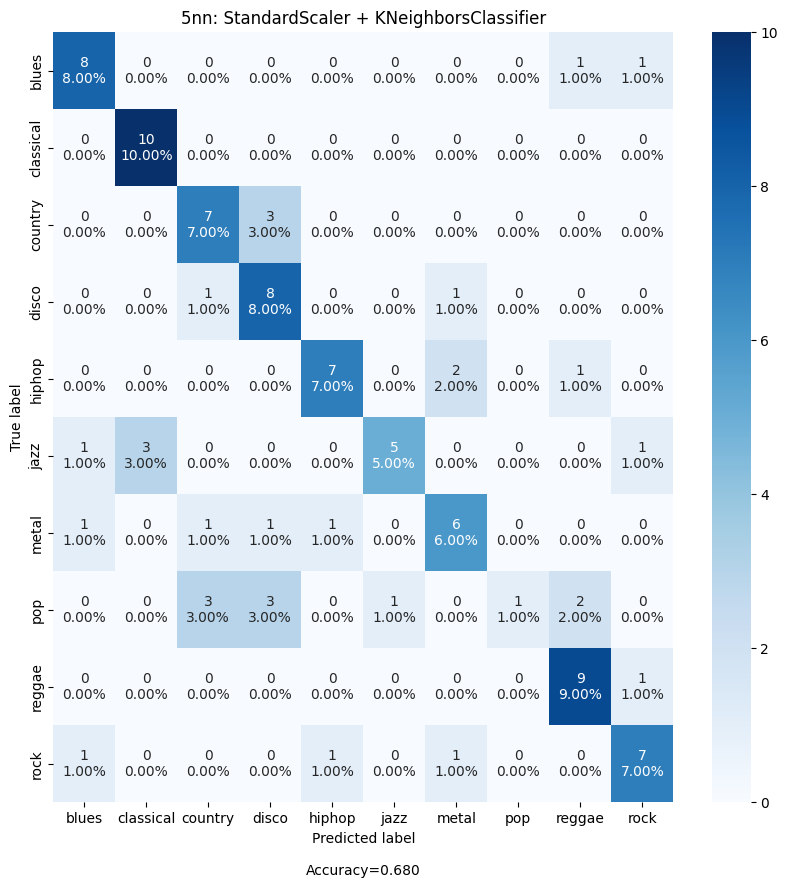

In [133]:
# Szukamy klasyfikatora
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

configs={'gnb':[StandardScaler(),GaussianNB()],
         'mnnb':[MinMaxScaler(feature_range=(1,2)),MultinomialNB(alpha=0.1)],
         'logreg':[StandardScaler(),LogisticRegression()],
         'dt-gini':[StandardScaler(),DecisionTreeClassifier(criterion='gini')],
         'dt-ent':[StandardScaler(),DecisionTreeClassifier(criterion='entropy')],
         'rf':[StandardScaler(),RandomForestClassifier(criterion='entropy')],
         'svc-rbf':[StandardScaler(),SVC()],
         'svc-poly':[StandardScaler(),SVC(kernel='poly',degree=2,C=1e5)],
         '1nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=1)],
         '3nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=3)],
         '5nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=5)],
         }


for k in configs:
  cv_show_confusion_matrix(X,y,labels=le.classes_,scaler=configs[k][0],classifier=configs[k][1],title=k)

### 3.2 Testujemy wszystkie klasyfikatory stosując walidację krzyżową

In [134]:
from sklearn.model_selection import cross_validate
from sklearn.utils import Bunch

scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
results = Bunch()
for k in configs:
  pipeline = make_pipeline(configs[k][0], configs[k][1])
  results[k] = cross_validate(pipeline, X, y, cv=10,scoring=scoring)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Tym razem results jest słownikiem, który nazwie konfiguracji przypisuje wyniki walidacji krzyżowej. A wyniki to odwzorowanie metryka->lista rezultatów.

In [135]:
# print(results)
for k in results:
  print(k)
  print(results[k])

rdf = pd.DataFrame(results)
rdf.head(10)



gnb
{'fit_time': array([0.0048759 , 0.00555801, 0.00261617, 0.00191784, 0.00210404,
       0.00187397, 0.00174499, 0.0016849 , 0.00166607, 0.00166893]), 'score_time': array([0.00432801, 0.00587916, 0.00354815, 0.00319505, 0.00314999,
       0.00290513, 0.00282598, 0.00284386, 0.0028038 , 0.00279999]), 'test_accuracy': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_precision_macro': array([0.85      , 0.48333333, 0.43333333, 0.7       , 0.55      ,
       0.85      , 0.5       , 0.7       , 0.85      , 0.38333333]), 'test_recall_macro': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_f1_macro': array([0.86666667, 0.51666667, 0.45      , 0.73333333, 0.56666667,
       0.86666667, 0.53333333, 0.73333333, 0.86666667, 0.41666667])}
mnnb
{'fit_time': array([0.00165296, 0.00154305, 0.00153494, 0.00153708, 0.00152612,
       0.00152493, 0.00151682, 0.00152683, 0.00150084, 0.00153017]), 'score_time': array([0.00274587, 0.00268698, 0.00266004, 0.00267005, 0.002

,gnb,mnnb,logreg,dt-gini,dt-ent,rf,svc-rbf,svc-poly,1nn,3nn,5nn
fit_time,"[0.004875898361206055, 0.005558013916015625, 0...","[0.0016529560089111328, 0.0015430450439453125,...","[0.005638837814331055, 0.005527019500732422, 0...","[0.0036721229553222656, 0.0035240650177001953,...","[0.0050280094146728516, 0.004804849624633789, ...","[0.07930111885070801, 0.08102178573608398, 0.0...","[0.0033750534057617188, 0.0025658607482910156,...","[0.002523183822631836, 0.0023369789123535156, ...","[0.0014431476593017578, 0.0015380382537841797,...","[0.0014407634735107422, 0.0014448165893554688,...","[0.0016641616821289062, 0.0014791488647460938,..."
score_time,"[0.004328012466430664, 0.00587916374206543, 0....","[0.0027458667755126953, 0.0026869773864746094,...","[0.002743959426879883, 0.0027551651000976562, ...","[0.0027818679809570312, 0.0027310848236083984,...","[0.0029370784759521484, 0.0027310848236083984,...","[0.006695985794067383, 0.005628108978271484, 0...","[0.003045797348022461, 0.0028951168060302734, ...","[0.0028488636016845703, 0.0027680397033691406,...","[0.003882884979248047, 0.0033957958221435547, ...","[0.003638029098510742, 0.003269195556640625, 0...","[0.0033121109008789062, 0.0032148361206054688,..."
test_accuracy,"[0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, ...","[0.8, 0.8, 0.6, 0.7, 0.7, 0.8, 0.7, 0.7, 0.9, ...","[1.0, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, ...","[0.7, 0.4, 0.5, 0.7, 0.2, 0.6, 0.7, 0.5, 0.4, ...","[0.5, 0.3, 0.4, 0.6, 0.4, 0.7, 0.8, 0.7, 0.6, ...","[0.9, 0.8, 0.6, 0.8, 0.8, 0.8, 0.6, 0.8, 0.9, ...","[0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.9, 0.9, 0.7, ...","[0.7, 0.6, 0.5, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, ...","[0.5, 0.7, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.5, 0.6, 0.7, 0.7, 0.6, 0.8, 0.7, 0.6, 0.8, ...","[0.6, 0.7, 0.6, 0.7, 0.5, 0.8, 0.7, 0.7, 0.9, ..."
test_precision_macro,"[0.85, 0.4833333333333333, 0.4333333333333333,...","[0.7, 0.75, 0.4833333333333333, 0.6, 0.6, 0.73...","[1.0, 0.7, 0.55, 0.55, 0.75, 0.733333333333333...","[0.65, 0.3, 0.35, 0.55, 0.1, 0.5, 0.6333333333...","[0.45, 0.18333333333333332, 0.25, 0.5, 0.3, 0....","[0.85, 0.7, 0.45, 0.7, 0.7, 0.7333333333333333...","[0.6, 0.6, 0.7, 0.7, 0.55, 0.7333333333333333,...","[0.65, 0.45, 0.3333333333333333, 0.7, 0.7, 0.5...","[0.45, 0.65, 0.6333333333333333, 0.55, 0.6, 0....","[0.4, 0.4333333333333333, 0.55, 0.55, 0.483333...","[0.5, 0.6333333333333333, 0.4, 0.5833333333333..."
test_recall_macro,"[0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, ...","[0.8, 0.8, 0.6, 0.7, 0.7, 0.8, 0.7, 0.7, 0.9, ...","[1.0, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, ...","[0.7, 0.4, 0.5, 0.7, 0.2, 0.6, 0.7, 0.5, 0.4, ...","[0.5, 0.3, 0.4, 0.6, 0.4, 0.7, 0.8, 0.7, 0.6, ...","[0.9, 0.8, 0.6, 0.8, 0.8, 0.8, 0.6, 0.8, 0.9, ...","[0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.9, 0.9, 0.7, ...","[0.7, 0.6, 0.5, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, ...","[0.5, 0.7, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.5, 0.6, 0.7, 0.7, 0.6, 0.8, 0.7, 0.6, 0.8, ...","[0.6, 0.7, 0.6, 0.7, 0.5, 0.8, 0.7, 0.7, 0.9, ..."
test_f1_macro,"[0.8666666666666666, 0.5166666666666667, 0.45,...","[0.7333333333333333, 0.7666666666666666, 0.516...","[1.0, 0.7333333333333333, 0.6, 0.6, 0.76666666...","[0.6666666666666666, 0.3333333333333333, 0.399...","[0.4666666666666666, 0.21666666666666665, 0.29...","[0.8666666666666666, 0.7333333333333333, 0.5, ...","[0.6333333333333333, 0.6333333333333333, 0.733...","[0.6666666666666666, 0.5, 0.3833333333333333, ...","[0.4666666666666666, 0.6666666666666666, 0.65,...","[0.4333333333333333, 0.4833333333333333, 0.6, ...","[0.5333333333333333, 0.65, 0.4666666666666666,..."


**TODO**
* Rozpakujmy te wyniki, tak aby w tabeli summary znalazły się wiersze podające średnie wartości metryk dla poszczególnych klasyfikatorów.

In [136]:
summary = pd.DataFrame(columns=['classifier','acc','prec','recall','f1'])
for k in results:
  row = [
      k, 
      results[k]['test_accuracy'].mean(), 
      results[k]['test_precision_macro'].mean(), 
      results[k]['test_recall_macro'].mean(), 
      results[k]['test_f1_macro'].mean()
  ]
  # print(row)
  summary.loc[len(summary),:]=row
summary.head(20)



,classifier,acc,prec,recall,f1
0,gnb,0.71,0.63,0.71,0.655
1,mnnb,0.74,0.651667,0.74,0.68
2,logreg,0.8,0.713333,0.8,0.741667
3,dt-gini,0.51,0.388333,0.51,0.426667
4,dt-ent,0.54,0.428333,0.54,0.465
5,rf,0.75,0.646667,0.75,0.68
6,svc-rbf,0.77,0.673333,0.77,0.705
7,svc-poly,0.69,0.57,0.69,0.608333
8,1nn,0.7,0.618333,0.7,0.643333
9,3nn,0.66,0.53,0.66,0.571667


### 3.3 Boxplots

Rysujemy wykres *boxplots*. Przeczytaj, jak należy go interpretować [Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/2324028251.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/2324028251.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/2324028251.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/2324028251.py:

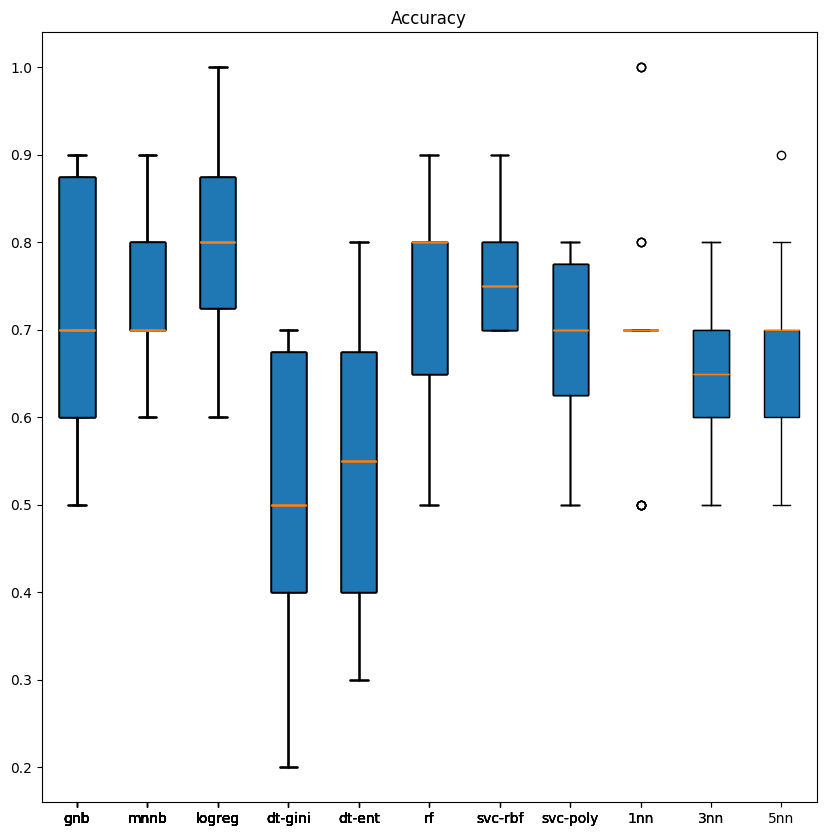

In [137]:
labels=[]
data=[]
for k in results:
  labels.append(k)
  data.append(results[k]['test_accuracy'])
  plt.boxplot(data,vert=True,  # vertical box alignment
                  patch_artist=True,  # fill with color
                  labels=labels)
  plt.title('Accuracy')


**TODO**
* Obserwując wartości F1, który klasyfikator wydaje się najlepszy (dla tego zbioru danych)
* Czy 1nn jest "lepszy" niż 3nn?

ad 1.

Klasyfikatory logreg oraz rf wydają się najlepsze, osiągając najwyższą medianę dokładności (około 0.8) oraz dobre rozpiętości wyników.

ad 2.

1nn wydaje się lepszy od 3nn, ponieważ jego mediana dokładności jest wyższa i wykazuje bardzo spójne wyniki dla większości przypadków. Niestety występują w jego przypadku wartości mocno odstające.

/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/530801737.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/530801737.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/530801737.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,vert=True,  # vertical box alignment
/var/folders/77/7b388r6d1dsfnytb_tltx9rw0000gn/T/ipykernel_56996/530801737.py:6: M

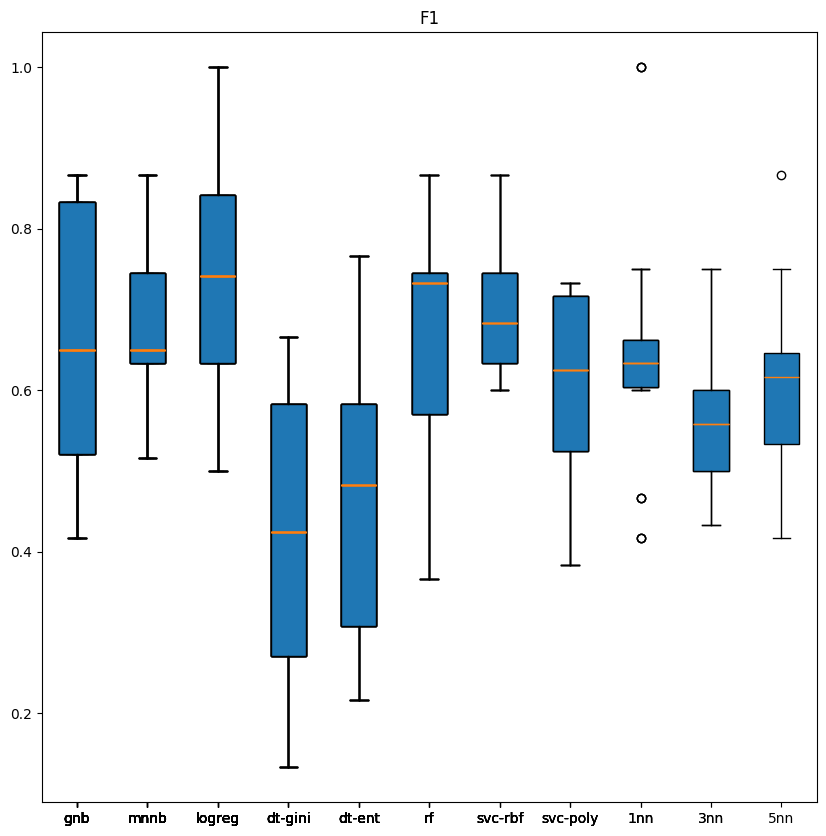

In [138]:
labels=[]
data=[]
for k in results:
  labels.append(k)
  data.append(results[k]['test_f1_macro'])
  plt.boxplot(data,vert=True,  # vertical box alignment
                  patch_artist=True,  # fill with color
                  labels=labels)
  plt.title('F1')


## 4. Optymalizacja parametrów
Zakładając, że mamy zbiory parametrów $A$, $B$, $C$,...,$Z$ procedura *grid search* bada wszystkie kombinacje ze zbioru $A \times B \times C \times \dots Z$, natomiast *random search* losowo wybiera określoną liczbę kombinacji.


### 4.1 Grid search

Zastosujemy do regresji logistycznej. W rzeczywistości będziemy dobierali tylko jeden parameter.

In [139]:
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(configs['logreg'][0], configs['logreg'][1])
pipeline


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

StandardScaler nie ma zbyt wielu parametrów, ale LogisticRegresion można dobierać stałą regularyzacji C.

Sprawdźmy, jakie nazwy maja parametry dla pipeline...


In [140]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [141]:

C=[100,50,20,10,8,5,3,2,1.0,0.8,0.5,0.2,0.1,0.05]
print(C)
params={'logisticregression__C':C}
grid = GridSearchCV(pipeline, params, scoring="f1_macro",cv=10, verbose=3)
grid.fit(X, y)
grid.best_params_

[100, 50, 20, 10, 8, 5, 3, 2, 1.0, 0.8, 0.5, 0.2, 0.1, 0.05]
Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ........logisticregression__C=100;, score=1.000 total time=   0.0s
[CV 2/10] END ........logisticregression__C=100;, score=0.767 total time=   0.0s
[CV 3/10] END ........logisticregression__C=100;, score=0.600 total time=   0.0s
[CV 4/10] END ........logisticregression__C=100;, score=0.600 total time=   0.0s
[CV 5/10] END ........logisticregression__C=100;, score=0.767 total time=   0.0s
[CV 6/10] END ........logisticregression__C=100;, score=0.617 total time=   0.0s
[CV 7/10] END ........logisticregression__C=100;, score=0.750 total time=   0.0s
[CV 8/10] END ........logisticregression__C=100;, score=0.733 total time=   0.0s
[CV 9/10] END ........logisticregression__C=100;, score=0.867 total time=   0.0s
[CV 10/10] END .......logisticregression__C=100;, score=0.633 total time=   0.0s
[CV 1/10] END .........logisticregression__C=50;, score=1.000 tota

{'logisticregression__C': 10}

In [142]:
pipeline=make_pipeline(StandardScaler(), LogisticRegression(C=grid.best_params_['logisticregression__C']))
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
for k in cv_results:
  print(f'{k}={cv_results[k].mean()}')

fit_time=0.00481882095336914
score_time=0.003077101707458496
test_accuracy=0.8300000000000001
test_precision_macro=0.7583333333333333
test_recall_macro=0.8300000000000001
test_f1_macro=0.7816666666666666


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### 4.2 Random search

Zastosujemy do SVM z kernelem RBF.

In [143]:
from sklearn.model_selection import RandomizedSearchCV
pipeline = make_pipeline(configs['svc-rbf'][0], configs['svc-rbf'][1])
pipeline


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Użyjemy klasy ```RandomizedSearchCV```.  Parametr ```n_iter``` określa, ile konfiguracji będzie testowane. Zdefiniujemy 10000 konfiguracji.

Wypróbujemy dwa parametry C oraz gamma.

**TODO**
* Zdefiniuj C jako listę/wektor 100 wartości od 0 do 2
* Zdefiniuj gamma jako listę/wektor 100 wartości od 0.01 do 2

In [144]:
C = np.linspace(0.01, 2, 100)
gamma = np.linspace(0.01, 2, 100)
params={'svc__C':C,'svc__gamma':gamma}
grid = RandomizedSearchCV(pipeline, params, scoring="f1_macro",cv=10, n_iter=100,verbose=3)
grid.fit(X, y)
grid.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.325 total time=   0.0s
[CV 2/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.300 total time=   0.0s
[CV 3/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.222 total time=   0.0s
[CV 4/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.020 total time=   0.0s
[CV 5/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.025 total time=   0.0s
[CV 6/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.192 total time=   0.0s
[CV 7/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.222 total time=   0.0s
[CV 8/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.122 total time=   0.0s
[CV 9/10] END svc__C=1.376868686868687, svc__gamma=1.1959595959595961;, score=0.429 total time=   0.0s
[CV 10/1

{'svc__gamma': 0.0301010101010101, 'svc__C': 1.175858585858586}

In [145]:
pipeline = make_pipeline(configs['svc-rbf'][0], SVC(kernel='rbf',C=grid.best_params_['svc__C'],gamma=grid.best_params_['svc__gamma']))
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']

cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
for k in cv_results:
  print(f'{k}={cv_results[k].mean()}')

fit_time=0.0027456045150756835
score_time=0.003241562843322754
test_accuracy=0.72
test_precision_macro=0.6333333333333332
test_recall_macro=0.72
test_f1_macro=0.6616666666666667


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Klasteryzacja

In [146]:
# Przeskalujemy wszystko

scl = StandardScaler()
Z = scl.fit_transform(X)

Oceń podobieństwo utworów na podstawie wyników klasteryzacji...

[67 65 73 75 51 71 57 81 53 91 69 89 66 93 77 63 70 52 59 86 58 92 87 61
 85 78 82 56 28 74 36 68 83 99 72 60 55 95 35 45 88 94 76 17 90 64 97 79
 80 38 39 42 96 84 43 31 27 47 34 37 18 50 46 44 62 30 41 54 40  8 49 24
 29 98 13 21 19 20 33 26  9 48 32 16 14 22 15  7 23 25 12 11  3  6  5 10
  4  2  1  0]


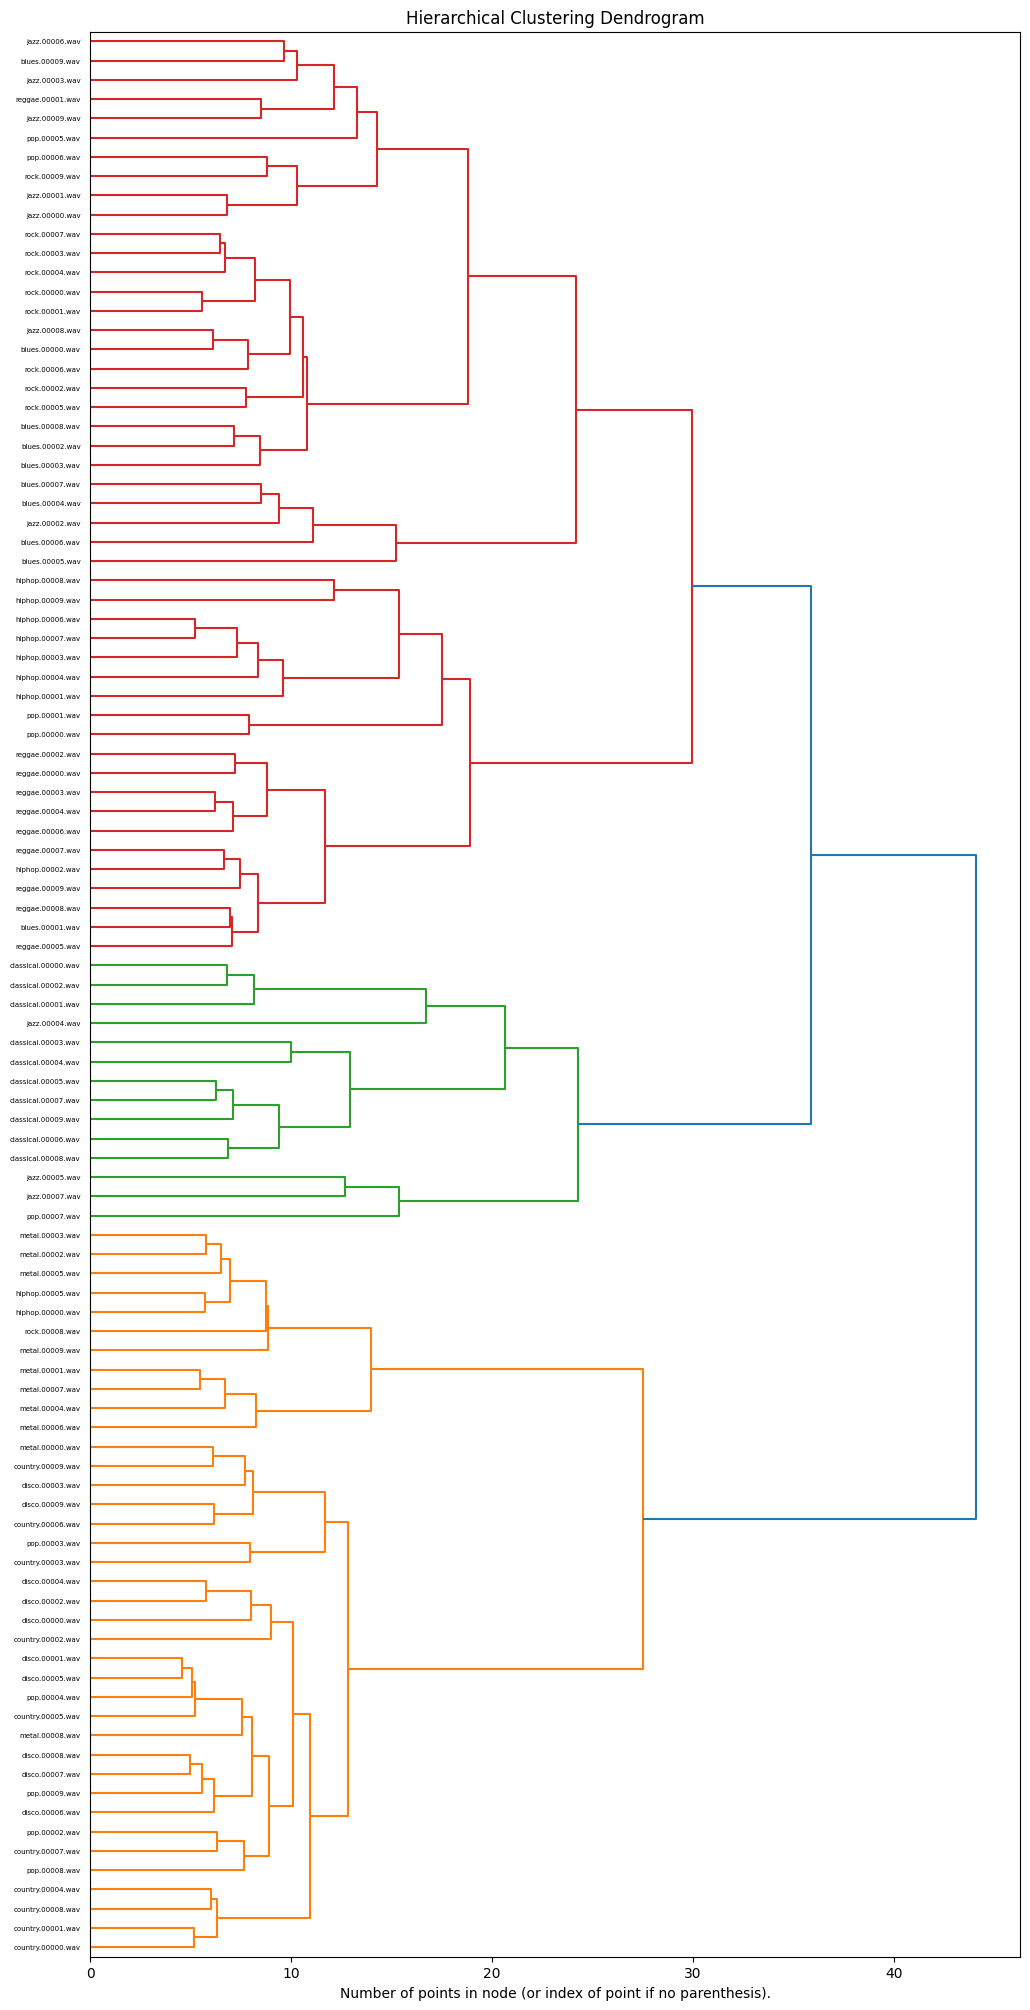

['classical.00009.wav' 'classical.00004.wav' 'classical.00002.wav'
 'classical.00003.wav' 'classical.00001.wav' 'classical.00008.wav'
 'classical.00006.wav' 'classical.00007.wav' 'classical.00000.wav'
 'classical.00005.wav' 'blues.00009.wav' 'blues.00004.wav'
 'blues.00002.wav' 'blues.00003.wav' 'blues.00008.wav' 'blues.00007.wav'
 'blues.00001.wav' 'blues.00006.wav' 'blues.00005.wav' 'blues.00000.wav'
 'rock.00005.wav' 'rock.00001.wav' 'rock.00008.wav' 'rock.00002.wav'
 'rock.00009.wav' 'rock.00003.wav' 'rock.00000.wav' 'rock.00007.wav'
 'rock.00006.wav' 'rock.00004.wav' 'jazz.00002.wav' 'jazz.00008.wav'
 'jazz.00007.wav' 'jazz.00006.wav' 'jazz.00000.wav' 'jazz.00003.wav'
 'jazz.00005.wav' 'jazz.00004.wav' 'jazz.00001.wav' 'jazz.00009.wav'
 'hiphop.00009.wav' 'hiphop.00007.wav' 'hiphop.00002.wav'
 'hiphop.00001.wav' 'hiphop.00000.wav' 'hiphop.00003.wav'
 'hiphop.00004.wav' 'hiphop.00008.wav' 'hiphop.00006.wav'
 'hiphop.00005.wav' 'country.00007.wav' 'country.00009.wav'
 'country.00000

In [147]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (12,25)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(Z)
print(model.labels_)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10,labels=df.file.to_numpy(),orientation='right')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

print(df.file.to_numpy())